In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [3]:
def getJetData(inputFiles):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    #cols.append('n_total')
    #cols.append('jet_eta')
    #cols.append('jet_theta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    #cols.append('dphi_e_jet')
    #cols.append('dR_q_jet')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [5]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [7]:
def applyCutsJets(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)

    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and apply cuts

In [8]:
df = getData(['boosted_jets.root'])
df = applyCuts(df)

mc = getData(['MC_boosted_jets.root'])
mc = applyCuts(mc)


Processed boosted_jets.root in 0.2 seconds
0.1 < y < 0.85 6581  fraction kept: 100.0
Q2>100 6581  fraction kept: 100.0
e_pt >10 3638  fraction kept: 55.3

Processed MC_boosted_jets.root in 0.0 seconds
0.1 < y < 0.85 32311  fraction kept: 100.0
Q2>100 32311  fraction kept: 100.0
e_pt >10 20098  fraction kept: 62.2


## plot electron variables (data and MC)

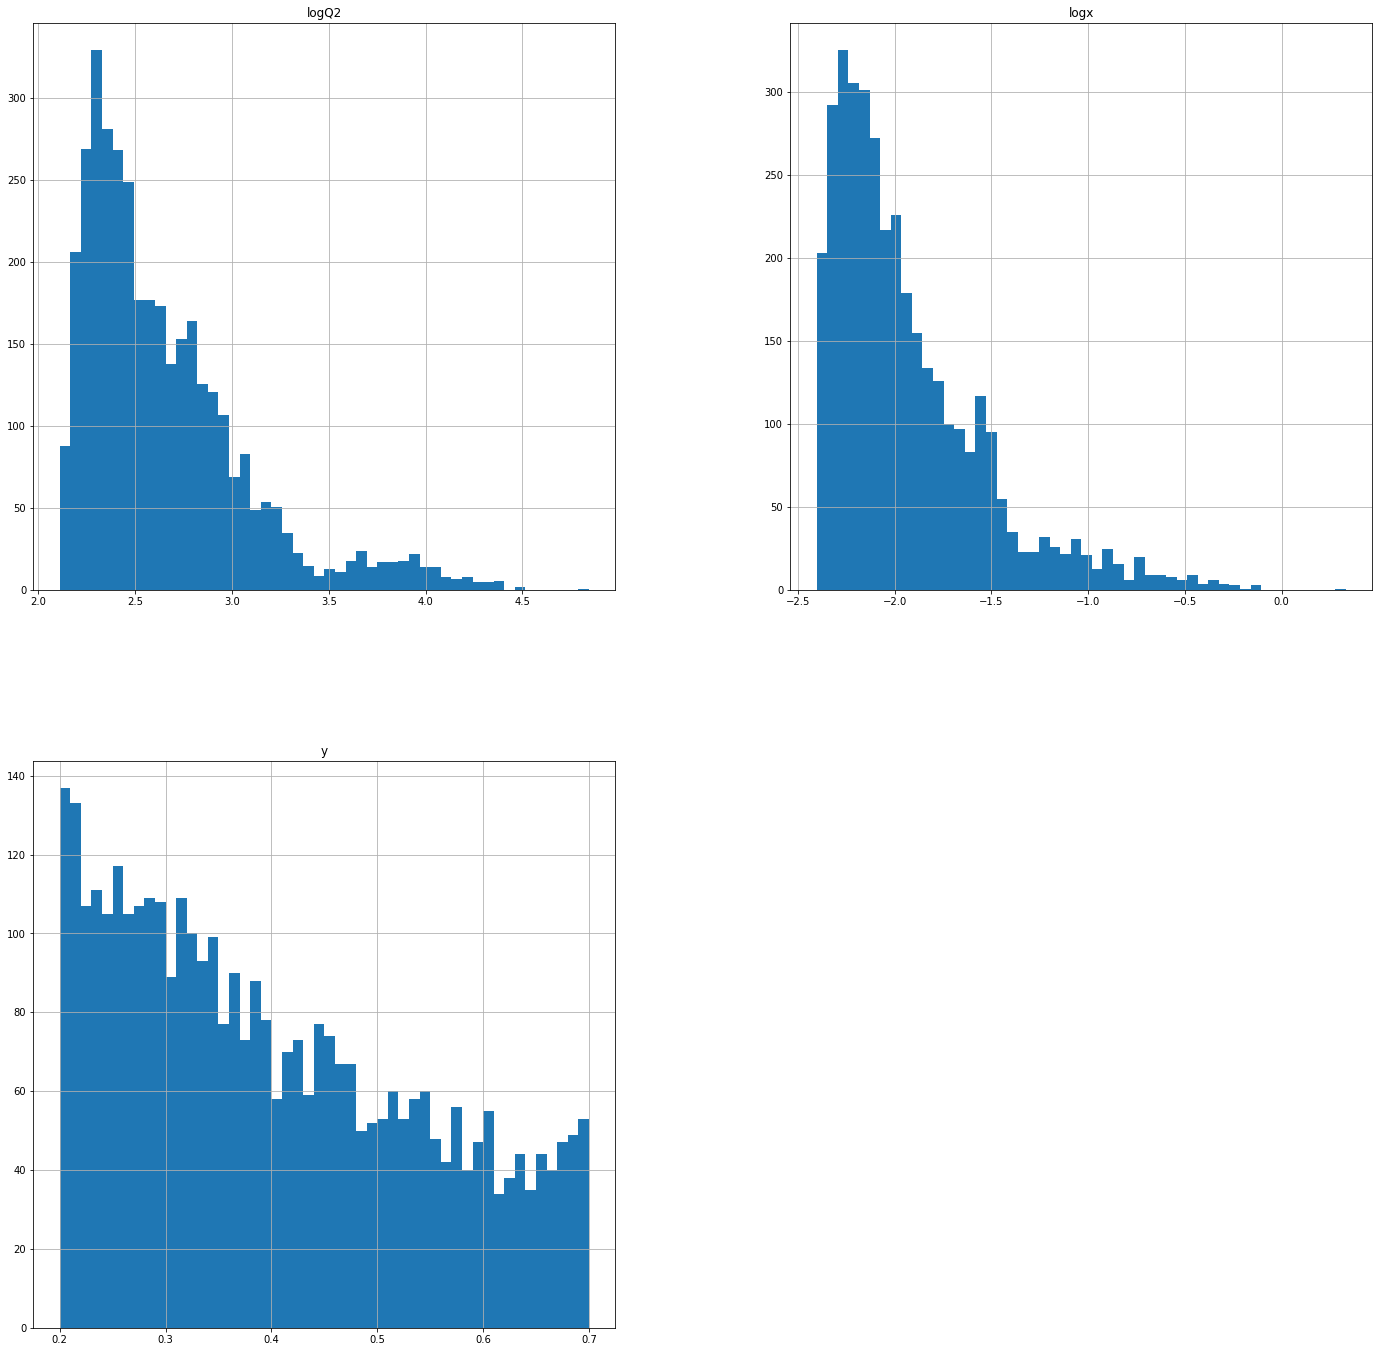

In [11]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

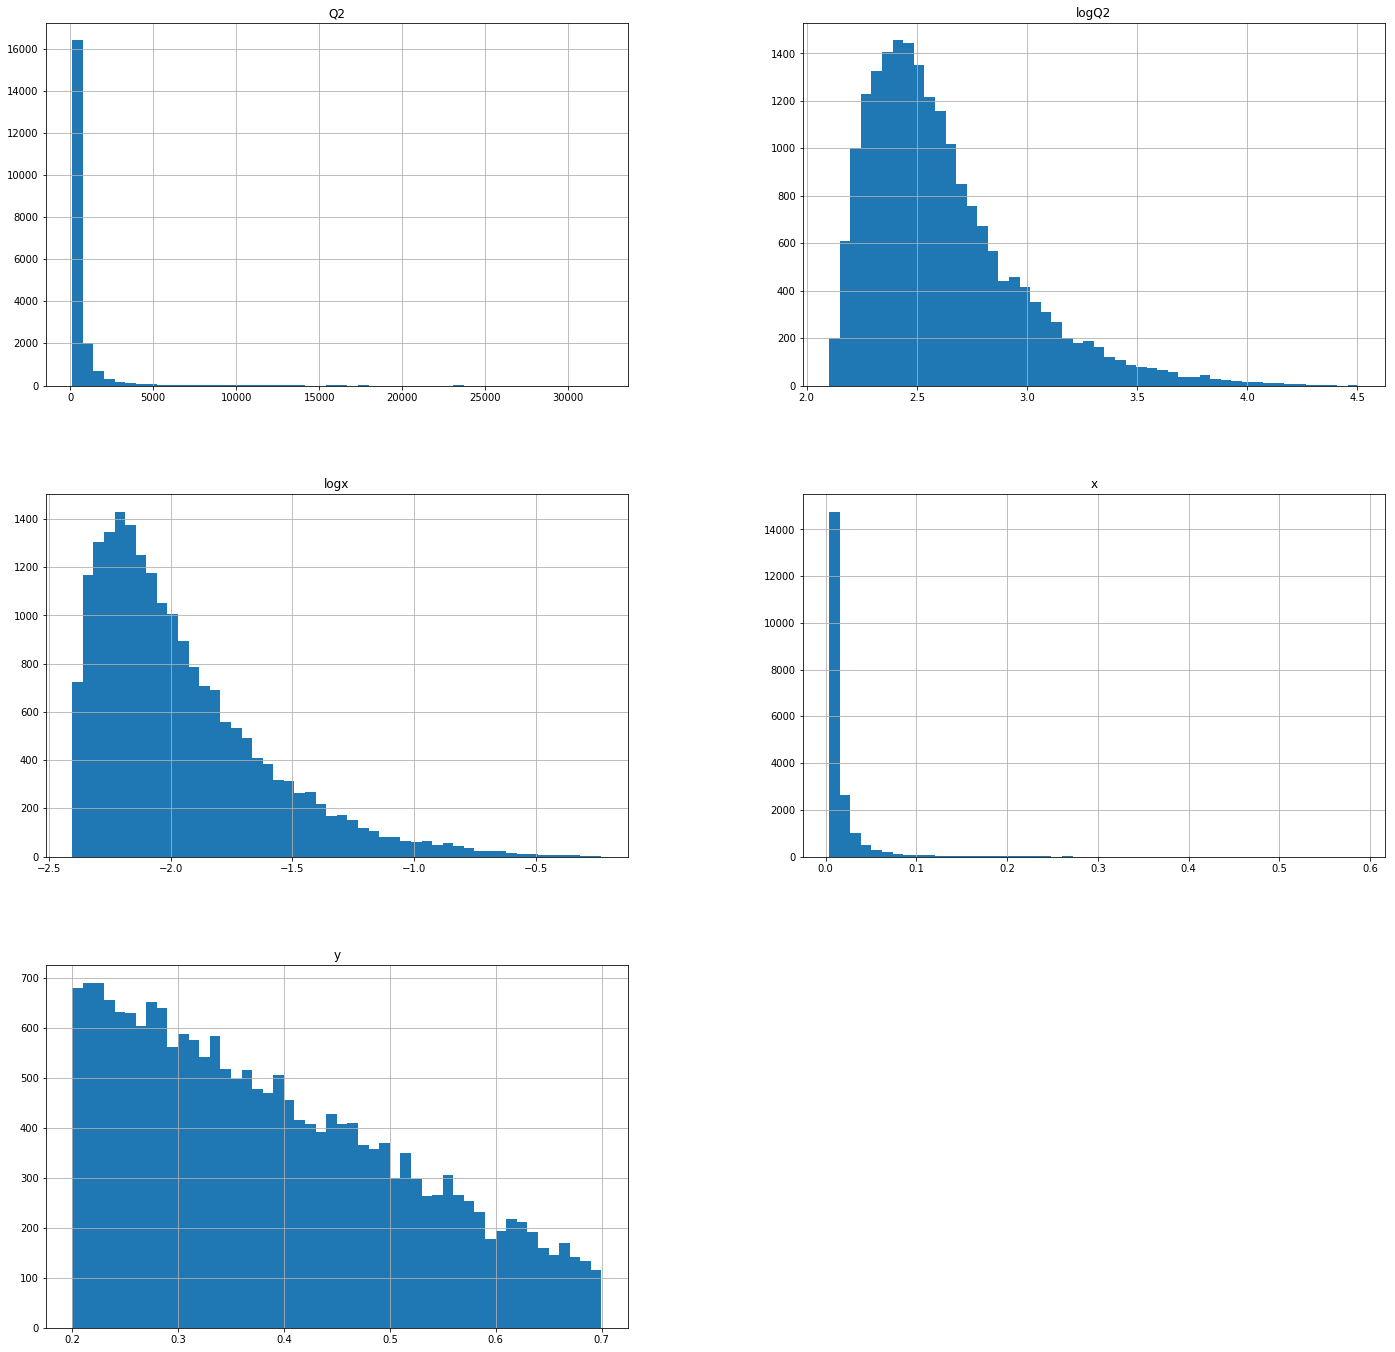

In [9]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

## Get jet data and apply selection

In [12]:
df_jet      = getJetData(['boosted_jets.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['MC_boosted_jets.root'])
mc_jet = applyCutsJets(mc_jet)


Processed boosted_jets.root in 0.1 seconds
0.1 < y < 0.85 3159  fraction kept: 100.0
Q2>100 3159  fraction kept: 100.0
e_pt >10 1891  fraction kept: 59.9
jet_pt>5 1891  fraction kept: 100.0

Processed MC_boosted_jets.root in 0.5 seconds
0.1 < y < 0.85 36374  fraction kept: 100.0
Q2>100 36374  fraction kept: 100.0
e_pt >10 24529  fraction kept: 67.4
jet_pt>5 24529  fraction kept: 100.0


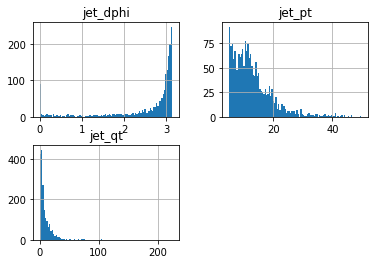

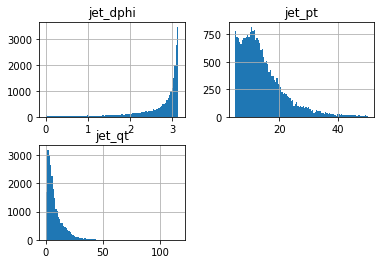

In [18]:
rc('text', usetex=False)
df_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()
mc_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()

## Peek into data format

In [19]:
df_jet.head()

,Q2,e_eta,jet_p,e_theta,jet_z,e_pt,jet_qt,jet_pt,e_p,y,x,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept
0,145.612549,-1.359228,9.294407,2.638745,0.788571,10.267633,1.271765,9.057107,21.305567,0.275994,0.005193,3.101160,0,0.140416,0.123862
1,174.857086,-1.300365,10.802114,2.609638,1.111574,11.624952,1.360921,10.336231,22.918997,0.227143,0.007577,3.101689,0,0.131665,0.117069
2,277.841400,-0.882355,9.304800,2.356889,0.236032,12.160895,4.694418,8.678501,17.210052,0.467727,0.005847,2.833943,0,0.540925,0.386026
3,277.841400,-0.882355,8.926324,2.356889,0.601249,12.160895,8.077743,6.009452,17.210052,0.467727,0.005847,2.519171,1,1.344173,0.664239
4,432.527893,-0.732627,14.490120,2.245505,0.549785,16.298828,2.395702,14.067765,20.872143,0.385816,0.011035,3.083946,0,0.170297,0.146986


Cross section [468.16894697 166.09775922  73.89282003  21.70741048   8.35095702]
Cross section [134.02690916  70.77375653  26.16167639   6.76463489   2.19762027]


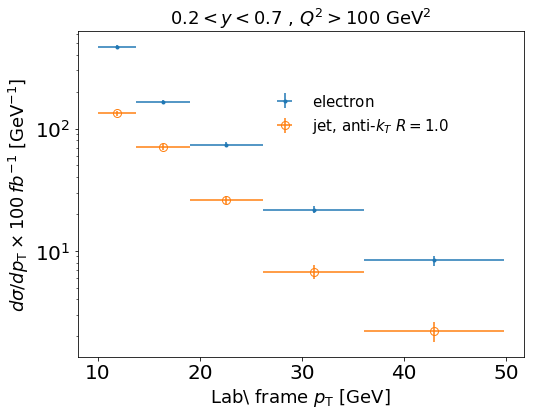

In [21]:
import seaborn as sns
nbins = 6
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel(r'$\mathrm{Lab}$\ $\mathrm{frame}$ $p_{\mathrm{T}}$ $\mathrm{[GeV]}$' ,fontsize=18)
ax1.set_ylabel(r'$d\sigma/d p_{\mathrm{T}} \times 100 \, fb^{-1}$ [$\mathrm{GeV^{-1}}$]', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 100\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

###Mean x vs pT
#ax2 = ax1.twinx()
#ax2.tick_params(axis='y', labelcolor='red')
#sns.regplot(df['e_pt'], df['x'], x_bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins),fit_reg=None,color='red')
#ax2.set_ylabel('Mean $x$' ,color='red',fontsize=16)
#plt.yticks(fontsize=18)
#plt.xticks(fontsize=18)
#ax2.set_ylim([0.0,1.0])
#ax2.scale('log')



plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


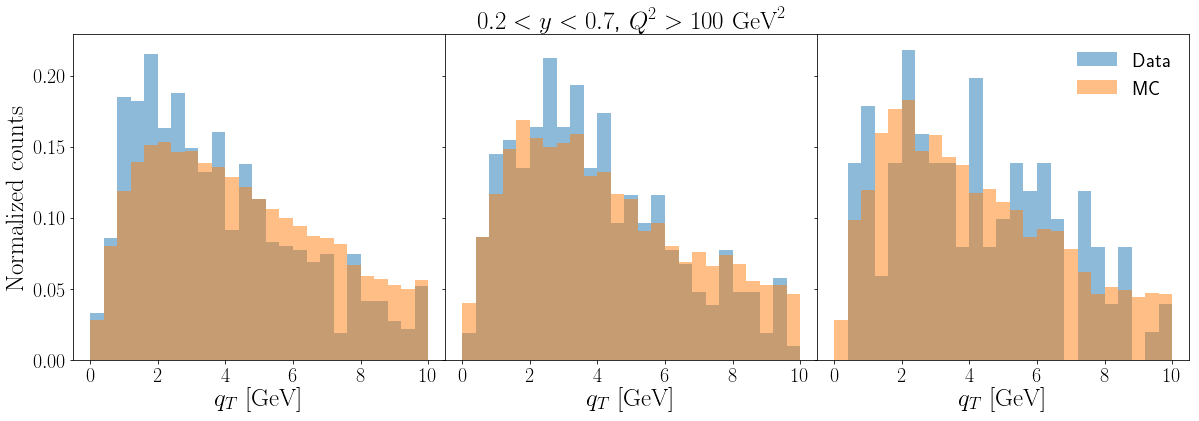

In [25]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.5,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.5, label='MC')
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

###########
###########
###########


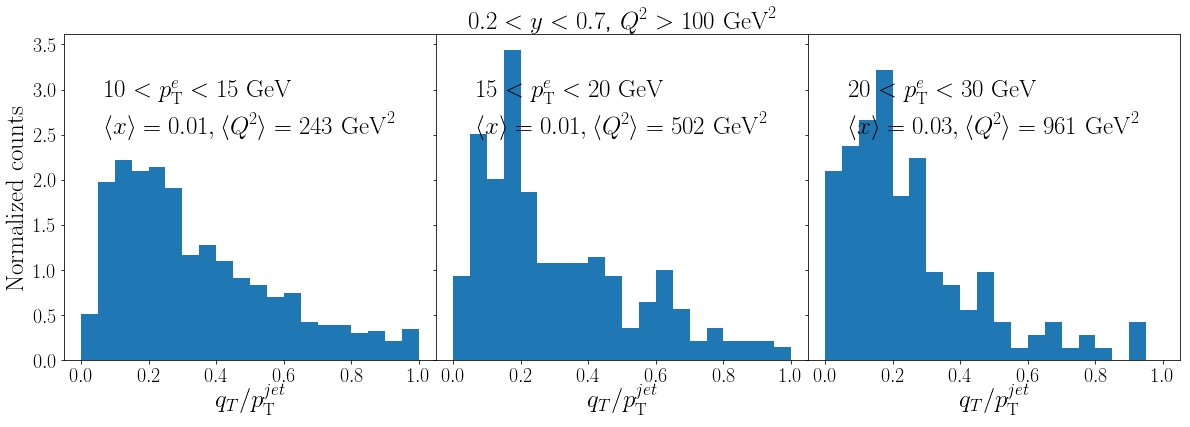

In [26]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    axs[counter].hist(df_cut['jet_qtnormjetpt'],bins=20,range=(0,1.0),normed=True)
    
    axs[counter].xaxis.set_label_text(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,3, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].text(0.07,2.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqtoverjetpt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqtoverjetpt.pdf', bbox_inches='tight')

17.0359  mean lepton pt
0.37833363  mean inelasticity
20.883375  mean jet p
14.310414  mean jet pT
count    383.000000
mean      14.310414
std        5.567770
min        5.005180
25%       10.330263
50%       14.680492
75%       17.897917
max       46.279335
Name: jet_pt, dtype: float64
0.013583375  mean x
502.26505  mean Q2
count     383.000000
mean      502.265045
std       174.031342
min       284.521027
25%       380.831604
50%       452.319672
75%       575.590729
max      1209.256348
Name: Q2, dtype: float64
###########


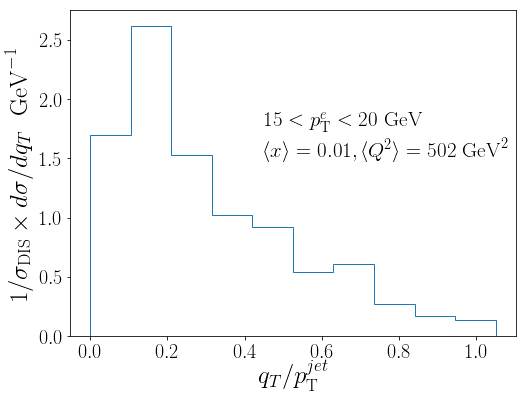

In [27]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),normed=True,histtype='step')    
plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.0359  mean lepton pt
0.37833363  mean inelasticity
20.883375  mean jet p
14.310414  mean jet pT
count    383.000000
mean      14.310414
std        5.567770
min        5.005180
25%       10.330263
50%       14.680492
75%       17.897917
max       46.279335
Name: jet_pt, dtype: float64
0.013583375  mean x
502.26505  mean Q2
count     383.000000
mean      502.265045
std       174.031342
min       284.521027
25%       380.831604
50%       452.319672
75%       575.590729
max      1209.256348
Name: Q2, dtype: float64
###########
259
17.1415  mean lepton pt
0.37941343  mean inelasticity
20.720932  mean jet p
14.607166  mean jet pT
count    5606.000000
mean       14.607166
std         5.550758
min         5.001261
25%        10.707687
50%        14.656776
75%        18.007545
max        48.905251
Name: jet_pt, dtype: float64
0.013538618  mean x
501.6041  mean Q2
count    5606.000000
mean      501.604095
std       151.692459
min       284.118225
25%       393.525208
50%       466.202637
75% 

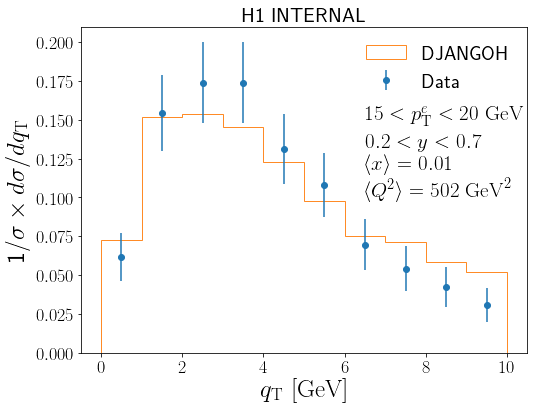

In [68]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
print integral 
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='DJANGOH',histtype='step')
printSummary(df_cut)

plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

17.0359  mean lepton pt
0.37833363  mean inelasticity
20.883375  mean jet p
14.310414  mean jet pT
count    383.000000
mean      14.310414
std        5.567770
min        5.005180
25%       10.330263
50%       14.680492
75%       17.897917
max       46.279335
Name: jet_pt, dtype: float64
0.013583375  mean x
502.26505  mean Q2
count     383.000000
mean      502.265045
std       174.031342
min       284.521027
25%       380.831604
50%       452.319672
75%       575.590729
max      1209.256348
Name: Q2, dtype: float64
###########
268.0
[48 76 41 30 29 14 22  8]
[6.92820323 8.71779789 6.40312424 5.47722558 5.38516481 3.74165739
 4.69041576 2.82842712]
[0.17910448 0.28358209 0.15298507 0.1119403  0.10820896 0.05223881
 0.08208955 0.02985075]


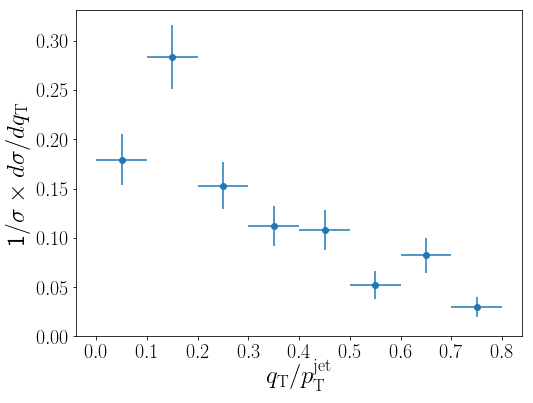

In [42]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

17.0359  mean lepton pt
0.37833363  mean inelasticity
20.883375  mean jet p
14.310414  mean jet pT
count    383.000000
mean      14.310414
std        5.567770
min        5.005180
25%       10.330263
50%       14.680492
75%       17.897917
max       46.279335
Name: jet_pt, dtype: float64
0.013583375  mean x
502.26505  mean Q2
count     383.000000
mean      502.265045
std       174.031342
min       284.521027
25%       380.831604
50%       452.319672
75%       575.590729
max      1209.256348
Name: Q2, dtype: float64
###########
321.0
[49 78 56 42 22 12 17 22 16  7]
[7.         8.83176087 7.48331477 6.4807407  4.69041576 3.46410162
 4.12310563 4.69041576 4.         2.64575131]
[0.15264798 0.24299065 0.17445483 0.13084112 0.06853583 0.03738318
 0.0529595  0.06853583 0.04984424 0.02180685]


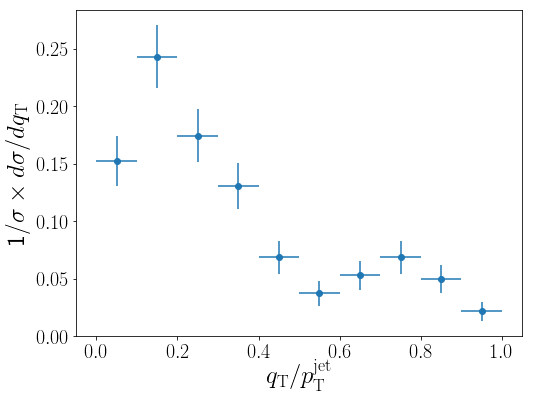

In [43]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormept'],bins=10,range=(0,1.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

###########
###########
###########
###########
###########
###########


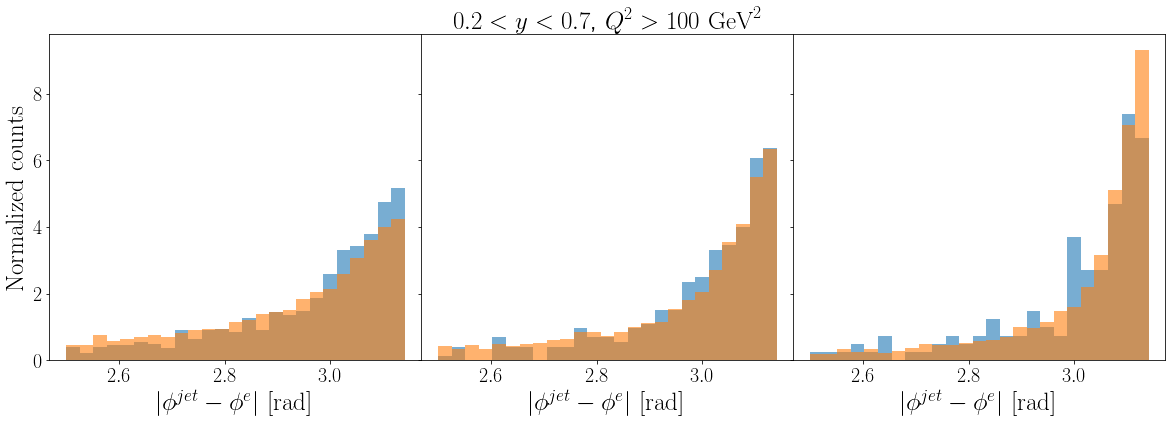

In [46]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

In [ ]:
plt.hist(df_jet['jet_dphi'],bins=25,normed=True)

## Markdown

17.0359  mean lepton pt
0.37833363  mean inelasticity
20.883375  mean jet p
14.310414  mean jet pT
count    383.000000
mean      14.310414
std        5.567770
min        5.005180
25%       10.330263
50%       14.680492
75%       17.897917
max       46.279335
Name: jet_pt, dtype: float64
0.013583375  mean x
502.26505  mean Q2
count     383.000000
mean      502.265045
std       174.031342
min       284.521027
25%       380.831604
50%       452.319672
75%       575.590729
max      1209.256348
Name: Q2, dtype: float64
###########
282


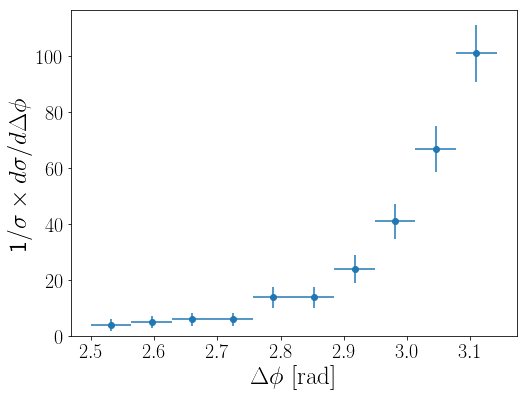

In [47]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    
y, x  = np.histogram(df_cut['jet_dphi'],bins=10,range=(2.5,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
integral = np.sum(y)
print integral 
#y = y/width
#y = y/integral
#erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')













plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')

(array([0.06796836, 0.87123084, 1.3346517 , 1.18017776, 1.11632905,
        1.08337469, 0.87329035, 0.90212541, 0.75795011, 0.78060672,
        0.71263788, 0.70028043, 0.64878842, 0.71263832, 0.70027956,
        0.70439973, 0.7414734 , 0.77648646, 0.71469797, 0.7414734 ,
        0.82385831, 0.77236812, 0.87535054, 0.90006632, 0.87328872,
        0.98245225, 0.9803926 , 1.17811884, 1.17399955, 1.12250555,
        1.25638548, 1.27080302, 1.33259247, 1.39026262, 1.27698196,
        1.27697879, 1.18223814, 1.16164166, 1.02776452, 0.90830491,
        0.819738  , 0.65290852, 0.56434504, 0.44076365, 0.33778149,
        0.2698146 , 0.18948718, 0.21832327, 0.14829431, 0.1379961 ]),
 array([0.   , 0.024, 0.048, 0.072, 0.096, 0.12 , 0.144, 0.168, 0.192,
        0.216, 0.24 , 0.264, 0.288, 0.312, 0.336, 0.36 , 0.384, 0.408,
        0.432, 0.456, 0.48 , 0.504, 0.528, 0.552, 0.576, 0.6  , 0.624,
        0.648, 0.672, 0.696, 0.72 , 0.744, 0.768, 0.792, 0.816, 0.84 ,
        0.864, 0.888, 0.912, 0.936

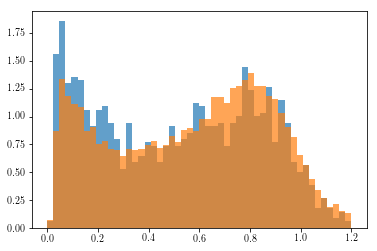

In [53]:
df_cut = df_jet.query('Q2>200')
plt.hist(df_cut['jet_z'],bins=50,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('Q2>200')
plt.hist(df_cut['jet_z'],bins=50,range = (0,1.2),alpha=0.7, normed=True)

###########
282.0
17.1415  mean lepton pt
0.37941343  mean inelasticity
20.720932  mean jet p
14.607166  mean jet pT
count    5606.000000
mean       14.607166
std         5.550758
min         5.001261
25%        10.707687
50%        14.656776
75%        18.007545
max        48.905251
Name: jet_pt, dtype: float64
0.013538618  mean x
501.6041  mean Q2
count    5606.000000
mean      501.604095
std       151.692459
min       284.118225
25%       393.525208
50%       466.202637
75%       571.842560
max      1270.637207
Name: Q2, dtype: float64
###########
158.0
23.956446  mean lepton pt
0.3747516  mean inelasticity
30.767042  mean jet p
20.037132  mean jet pT
count    3552.000000
mean       20.037132
std         7.549610
min         5.019204
25%        15.097337
50%        20.689960
75%        25.054613
max        47.070728
Name: jet_pt, dtype: float64
0.026794171  mean x
983.12354  mean Q2
count    3552.000000
mean      983.123535
std       356.472321
min       508.635071
25%       716.300

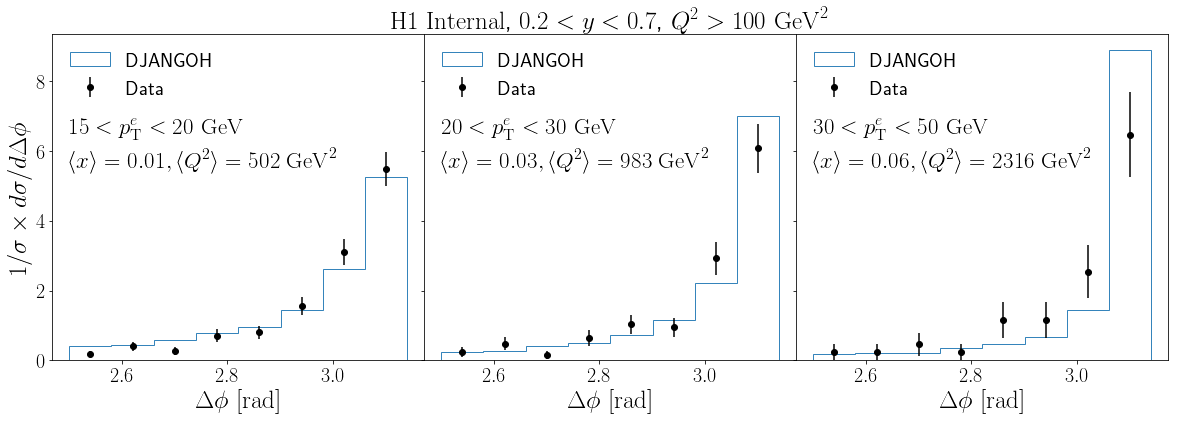

In [67]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_dphi'],bins=8,range=(2.5,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=8,range=(2.5,np.pi),normed=True,alpha=0.9, label='DJANGOH',histtype='step')
    printSummary(df_cut)
    
    
    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(2.5,5.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

In [ ]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(10,15), (15,20),(20,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    #y = y/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black')
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$ $\mathrm{[GeV]}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqt.png', bbox_inches='tight')
plt.savefig('H1_Leptonqt.pdf', bbox_inches='tight')